# Graph Tool Sanbox

In [1]:
# Mathematical and Data Managment
import numpy as np
import pandas as pd
import scipy.sparse as sp

# Graph Managment
import graph_tool.all as gt
import networkx as nx
from utils.Functions import *
from utils.Segregation import *
 
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from fa2.forceatlas2 import ForceAtlas2

# Miscellaneous
from glob import glob
from tqdm import tqdm
import random
from importlib import reload

# Create ForceAtlas2 object with desired parameters
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=True,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

/mnt/disk2/anaconda3/envs/gt_global/lib/python3.11/site-packages/graph_tool/draw/cairo_draw.py:1544: RuntimeWarning: Error importing Gtk module: ; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


Grafo Minimo reproducible similar al grafo grande

In [3]:
# Load the graph
test_file = "/mnt/disk2/Data/3_Day_Graphs/starting_2021-05-03.graphml"

# Load Grap
g = gt.load_graph(test_file)

sub_g = fraction_graph(g, 60)
G = to_networkx(sub_g)

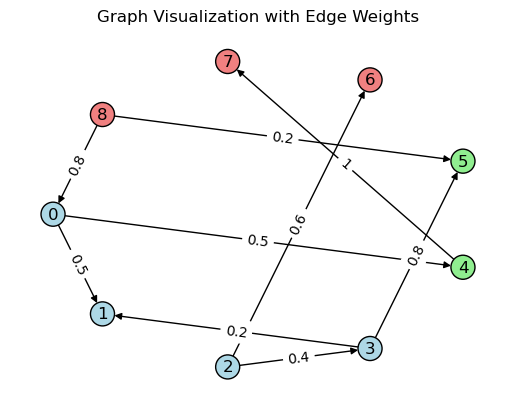

In [88]:
edge_list = [
    (0,1, {'Normal Weights': 0.5, 'Number of Rts': 2}),
    (0,4, {'Normal Weights': 0.5, 'Number of Rts': 2}),
    (2,3, {'Normal Weights': 0.4, 'Number of Rts': 2}),
    (2,6, {'Normal Weights': 0.6, 'Number of Rts': 3}),
    (3,1, {'Normal Weights': 0.2, 'Number of Rts': 2}),
    (3,5, {'Normal Weights': 0.8, 'Number of Rts': 8}),
    (4,7, {'Normal Weights': 1, 'Number of Rts': 3}),
    (8,0, {'Normal Weights': 0.8, 'Number of Rts': 4}),
    (8,5, {'Normal Weights': 0.2, 'Number of Rts': 1}),
]

nodes = [
    (0, {'Political Label': 'Izquierda', 'Retweets': 4, 'Total Tweets': 6}),
    (1, {'Political Label': 'Izquierda', 'Retweets': 0, 'Total Tweets': 2}),
    (2, {'Political Label': 'Izquierda', 'Retweets': 5, 'Total Tweets': 8}),
    (3, {'Political Label': 'Izquierda', 'Retweets': 10, 'Total Tweets': 12}),
    (4, {'Political Label': 'Centro', 'Retweets': 3, 'Total Tweets': 4}),
    (5, {'Political Label': 'Centro', 'Retweets': 0, 'Total Tweets': 5}),
    (6, {'Political Label': 'Derecha', 'Retweets': 0, 'Total Tweets': 7}),
    (7, {'Political Label': 'Derecha', 'Retweets': 0, 'Total Tweets': 8}),
    (8, {'Political Label': 'Derecha', 'Retweets': 5, 'Total Tweets': 9}),
]
G = nx.DiGraph()
# Add nodes and their attributes
G.add_nodes_from(nodes)

# Add edges and their attributes
G.add_edges_from(edge_list)

g = to_graphtool(G)

color_map_dict = {
    'No Retweets': 'lightgray',
    'Izquierda': 'lightblue',
    'Derecha': 'lightcoral',
    'Centro': 'lightgreen'
}
random.seed(968)
pos = nx.shell_layout(G)
#pos = {n: (random.random(), random.random()) for n in G.nodes}
color_map_node = [color_map_dict[G.nodes[node]['Political Label']] for node in G]
# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color=color_map_node, edgecolors='black')

# Draw the edges
nx.draw_networkx_edges(G, pos)

# Draw node labels
nx.draw_networkx_labels(G, pos)

# Edge labels: 'Normal Weights'
edge_labels = nx.get_edge_attributes(G, 'Normal Weights')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graph Visualization with Edge Weights")
plt.axis('off')  # Turn off the axis
plt.show()

In [115]:
# Optionally, to verify or visualize the graph, you can print out the nodes and edges
print("Nodes and their attributes:")
for n, attr in G.nodes(data=True):
    print(n, attr)

print("\nEdges and their attributes:")
for u, v, attr in G.edges(data=True):
    print((u, v), attr)

Nodes and their attributes:
0 {'Political Label': 'Izquierda', 'Retweets': 4, 'Total Tweets': 6}
1 {'Political Label': 'Izquierda', 'Retweets': 0, 'Total Tweets': 2}
2 {'Political Label': 'Izquierda', 'Retweets': 5, 'Total Tweets': 8}
3 {'Political Label': 'Izquierda', 'Retweets': 10, 'Total Tweets': 12}
4 {'Political Label': 'Centro', 'Retweets': 3, 'Total Tweets': 4}
5 {'Political Label': 'Centro', 'Retweets': 0, 'Total Tweets': 5}
6 {'Political Label': 'Derecha', 'Retweets': 0, 'Total Tweets': 7}
7 {'Political Label': 'Derecha', 'Retweets': 0, 'Total Tweets': 8}
8 {'Political Label': 'Derecha', 'Retweets': 5, 'Total Tweets': 9}

Edges and their attributes:
(0, 1) {'Normal Weights': 0.5, 'Number of Rts': 2}
(0, 4) {'Normal Weights': 0.5, 'Number of Rts': 2}
(2, 3) {'Normal Weights': 0.4, 'Number of Rts': 2}
(2, 6) {'Normal Weights': 0.6, 'Number of Rts': 3}
(3, 1) {'Normal Weights': 0.2, 'Number of Rts': 2}
(3, 5) {'Normal Weights': 0.8, 'Number of Rts': 8}
(4, 7) {'Normal Weights': 

In [130]:
for s,t,d in G.edges(data=True):
    print(s,t, f"Peso a mano {d['Number of Rts']/G.nodes(data=True)[s]['Retweets']}", f"Peso en lista {d['Normal Weights']}")

0 1 Peso a mano 0.5 Peso en lista 0.5
0 4 Peso a mano 0.5 Peso en lista 0.5
2 3 Peso a mano 0.4 Peso en lista 0.4
2 6 Peso a mano 0.6 Peso en lista 0.6
3 1 Peso a mano 0.2 Peso en lista 0.2
3 5 Peso a mano 0.8 Peso en lista 0.8
4 7 Peso a mano 1.0 Peso en lista 1
8 0 Peso a mano 0.8 Peso en lista 0.8
8 5 Peso a mano 0.2 Peso en lista 0.2


In [58]:
for e in list(G.edges(data=True)):
    print(e)

(1, 2, {'Normal Weights': 0.5, 'Number of Rts': 2})
(1, 5, {'Normal Weights': 0.5, 'Number of Rts': 2})
(3, 4, {'Normal Weights': 0.4, 'Number of Rts': 2})
(3, 7, {'Normal Weights': 0.6, 'Number of Rts': 3})
(4, 2, {'Normal Weights': 0.2, 'Number of Rts': 2})
(4, 6, {'Normal Weights': 0.8, 'Number of Rts': 8})
(5, 8, {'Normal Weights': 1, 'Number of Rts': 3})
(9, 1, {'Normal Weights': 0.8, 'Number of Rts': 4})
(9, 6, {'Normal Weights': 0.2, 'Number of Rts': 1})


In [93]:
# FUNCTION TESTING
print('Adjacency Matrix (Can have weights or be simple 1-0)')
print(get_adjacency(g, 'Normal Weights'))
print(' ')
print('Nodes')
print(g.get_vertices())
print(' ')
print('Types Array')
print(get_types_array(g,types='Political Label'))
print(' ')
print('Types Dictionary')
print(get_types_dict(g,types='Political Label'))
print(' ')
print('Types Index Dictionary')
print(get_types_index(g,types='Political Label'))
print(' ')
print('Types Matrix (A column is one of the arrays in the Types Dictionary)')
print(get_types_matrix(g,types='Political Label'))
print(' ')
print('Contact Layer')
print(get_contact_layer(g,types='Political Label', weights = 'Normal Weights'))
print(' ')
print('Non Contact Layer')
print(get_non_contact_layer(g,types='Political Label'))
print(' ')
print('Me Vs Others (Contact Layer considering one group Against all others) for Izquierda')
print(me_vs_others(get_contact_layer(g,types='Political Label', weights = 'Normal Weights'), get_types_index(g,types='Political Label')['Izquierda'] ))

Adjacency Matrix (Can have weights or be simple 1-0)
[[0.  0.5 0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.4 0.  0.  0.6 0.  0. ]
 [0.  0.2 0.  0.  0.  0.8 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.8 0.  0.  0.  0.  0.2 0.  0.  0. ]]
 
Nodes
[0 1 2 3 4 5 6 7 8]
 
Types Array
['Izquierda' 'Izquierda' 'Izquierda' 'Izquierda' 'Centro' 'Centro'
 'Derecha' 'Derecha' 'Derecha']
 
Types Dictionary
{'Centro': [0, 0, 0, 0, 1, 1, 0, 0, 0], 'Derecha': [0, 0, 0, 0, 0, 0, 1, 1, 1], 'Izquierda': [1, 1, 1, 1, 0, 0, 0, 0, 0]}
 
Types Index Dictionary
{'Centro': 0, 'Derecha': 1, 'Izquierda': 2}
 
Types Matrix (A column is one of the arrays in the Types Dictionary)
[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]
 
Contact Layer
[[0.  1.  0. ]
 [0.2 0.  0.8]
 [1.3 0.6 1.1]]
 
Non Contact Layer
[[ 2.  5.